# DBSCAN (Density-Based Spatial Clustering of Application with Noise)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Pairwise squared distance

In [2]:
X = np.array([
    [1, 2],
    [3, 4],
    [5, 7]
])
X.shape

(3, 2)

In [3]:
# Manual method
D_01 = np.square(X[0,0] - X[1,0]) + np.square(X[0,1] - X[1,1])
D_02 = np.square(X[0,0] - X[2,0]) + np.square(X[0,1] - X[2,1])
D_12 = np.square(X[1,0] - X[2,0]) + np.square(X[1,1] - X[2,1])
print(D_01, D_02, D_12)

D_squared = np.array([
    [0, D_01, D_02],
    [D_01, 0, D_12],
    [D_02, D_12, 0]
])
print(D_squared)

8 41 13
[[ 0  8 41]
 [ 8  0 13]
 [41 13  0]]


In [4]:
# Vectorized method
# (a - b)^2 = a^2 + b^2 - 2ab

a_squared = np.sum(np.square(X), axis=1).reshape(1, -1) # shape (1,N)
b_squared = a_squared.T                                 # shape (N,1)
ab = np.dot(X, X.T)                                     # shape (N,N)
D_squared = a_squared + b_squared - 2 * ab                      # shape (N,N)
D_squared

array([[ 0,  8, 41],
       [ 8,  0, 13],
       [41, 13,  0]])

In [5]:
def compute_pairwise_squared_distances(X):
    """Compute the pairwise squared Euclidean distances between points in X."""
    # (a - b)^2 = a^2 + b^2 - 2ab

    a_squared = np.sum(np.square(X), axis=1).reshape(1, -1) # shape (1,N)
    b_squared = a_squared.T                                 # shape (N,1)
    ab = np.dot(X, X.T)                                     # shape (N,N)
    D_squared = a_squared + b_squared - 2 * ab                      # shape (N,N)
    return D_squared

In [6]:
compute_pairwise_squared_distances(X)

array([[ 0,  8, 41],
       [ 8,  0, 13],
       [41, 13,  0]])

## 2. DBSCAN from scratch

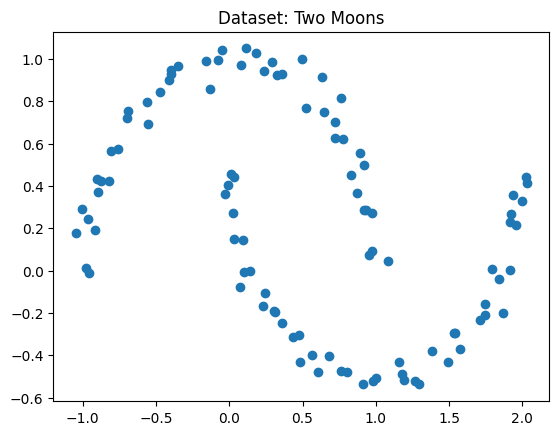

In [7]:
from sklearn.datasets import make_moons

X = make_moons(n_samples=100, noise=0.05, random_state=0)[0]

plt.scatter(X[:, 0], X[:, 1])
plt.title("Dataset: Two Moons")
plt.show()

### Step 1: Compute pairwise squared distance

In [8]:
# Hyperparameters
EPS = 0.2
MIN_SAMPLES = 5

# compute pairwise squared distances
D_squared = compute_pairwise_squared_distances(X)
D_squared.shape

(100, 100)

In [9]:
D_squared[:3, :3]

array([[0.        , 4.76011893, 1.90906485],
       [4.76011893, 0.        , 0.68792799],
       [1.90906485, 0.68792799, 0.        ]])

### Step 2: Find neighbors

In [10]:
# A sample is a neighbor if distance squared is less than EPS squared
is_neighbors = D_squared < EPS**2 # np.sqrt(D_squared) < EPS
is_neighbors

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True]], shape=(100, 100))

In [11]:
neighbors = [np.where(is_neighbors[i])[0] for i in range(X.shape[0])]

for i in range(X.shape[0]):
    print(f"Point {i}: Neighbors -> {neighbors[i]}")

Point 0: Neighbors -> [ 0 17 35 54 58 80]
Point 1: Neighbors -> [ 1 32 69 88 90]
Point 2: Neighbors -> [ 2 22 40 44 52]
Point 3: Neighbors -> [ 3  8 37 63 86]
Point 4: Neighbors -> [ 4  7 29 39 64 78 79]
Point 5: Neighbors -> [ 5  9 73 77 95]
Point 6: Neighbors -> [ 6 45 68]
Point 7: Neighbors -> [ 4  7 23 39 78]
Point 8: Neighbors -> [ 3  8 10 34 37 55 59]
Point 9: Neighbors -> [ 5  9 27 73 77 95]
Point 10: Neighbors -> [ 8 10 34 55 59]
Point 11: Neighbors -> [11 32 50]
Point 12: Neighbors -> [12 29 31 64 79 82]
Point 13: Neighbors -> [13 45 56 60 68 87]
Point 14: Neighbors -> [14 19 22 26 49 60 94]
Point 15: Neighbors -> [15 18 35 61 66 71]
Point 16: Neighbors -> [16 17 58 70 76 92]
Point 17: Neighbors -> [ 0 16 17 58 80 92]
Point 18: Neighbors -> [15 18 53 57 61 66 71]
Point 19: Neighbors -> [14 19 26 60 94]
Point 20: Neighbors -> [20 42 43 47 48 84 99]
Point 21: Neighbors -> [21 30 38 41 62 85 97]
Point 22: Neighbors -> [ 2 14 22 26 44 49]
Point 23: Neighbors -> [ 7 23 75 78 89]
Po

In [12]:
neighbors_counts = np.sum(is_neighbors, axis=1)
neighbors_counts

array([6, 5, 5, 5, 7, 5, 3, 5, 7, 6, 5, 3, 6, 6, 7, 6, 6, 6, 7, 5, 7, 7,
       6, 5, 6, 2, 7, 5, 6, 6, 8, 6, 6, 6, 5, 5, 5, 5, 7, 4, 3, 6, 7, 7,
       5, 5, 4, 6, 6, 5, 4, 5, 3, 6, 4, 5, 5, 5, 7, 5, 8, 5, 7, 6, 6, 6,
       6, 6, 7, 5, 6, 5, 4, 7, 4, 5, 6, 5, 6, 6, 6, 5, 7, 6, 6, 7, 7, 6,
       6, 6, 7, 6, 7, 5, 6, 7, 6, 6, 5, 7])

### Step 3: Find core points

Number of core points: 89


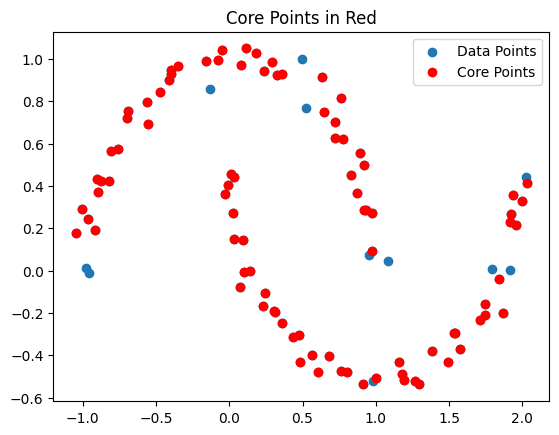

In [13]:
is_core = neighbors_counts >= MIN_SAMPLES

core_points = X[is_core]
print(f"Number of core points: {core_points.shape[0]}")

plt.scatter(X[:, 0], X[:, 1], label='Data Points')
plt.scatter(core_points[:, 0], core_points[:, 1], color='red', label='Core Points')
plt.title("Core Points in Red")
plt.legend()
plt.show()

### Step 4: Assign clusters

In [14]:
def expand_cluster(point_idx, cluster_id, neighbors, is_core, labels, visited):
    """For this current point, visiting all its neighbors. If neighbor is a core point, continue to visit its neighbors. If not, label it to this current cluster."""
    candidates = list(neighbors[point_idx])
    labels[point_idx] = cluster_id

    while candidates:
        current_point = candidates.pop()

        if not visited[current_point]:
            visited[current_point] = True

            if is_core[current_point]:
                for neighbor_idx in neighbors[current_point]:
                    candidates.append(int(neighbor_idx))

        if labels[current_point] == -1:
            labels[current_point] = cluster_id
    return labels

In [15]:
n_samples = X.shape[0]
labels = -1 * np.ones(n_samples, dtype=int) # -1: noise
visited = np.zeros(n_samples, dtype=bool)
cluster_id = 0

for i in range(n_samples):
    if not visited[i]:
        visited[i] = True

        if is_core[i]:
            labels = expand_cluster(
                point_idx=i,
                cluster_id=cluster_id,
                neighbors=neighbors,
                is_core=is_core,
                labels=labels,
                visited=visited
            )
            cluster_id += 1

labels

array([ 0,  1,  2,  1,  1,  3,  2,  1,  1,  3,  1,  1,  1,  2,  2,  0,  0,
        0,  0,  2,  0,  1,  2,  1,  0, -1,  2,  3,  1,  1,  1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  2,  1,  0,  0,  2,  2,  0,  0,  0,  2,  1,
        1,  2,  0,  0,  1,  2,  0,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,
        2,  1,  0,  0,  0,  3,  3,  1,  0,  3,  1,  1,  0,  0,  1,  0,  0,
        1,  1,  2,  1,  1,  1,  0,  0,  1,  2,  3,  1,  1,  0,  0])

### Step 5: Show clusters

In [16]:
def show_clusters(X, labels):
    unique_cluster_ids = np.unique(labels)
    for cluster in unique_cluster_ids:
        cluster_points = X[labels == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
    plt.legend()
    plt.show()

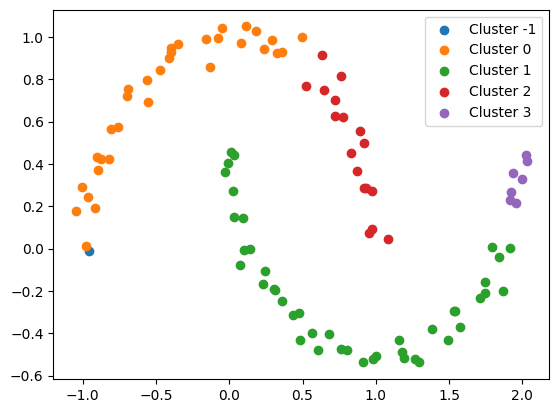

In [17]:
show_clusters(X, labels)

## 3. DBSCAN from sklearn

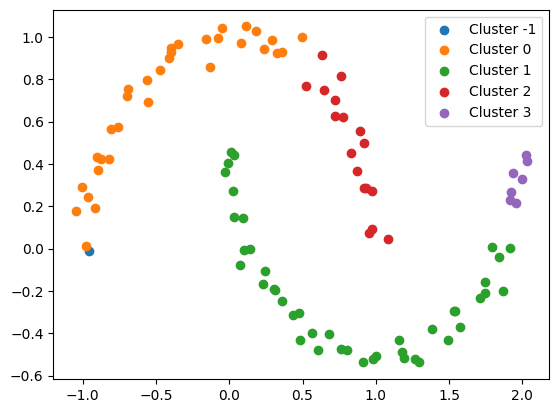

In [18]:
from sklearn.cluster import DBSCAN

sk_clusterer = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES)
sk_labels = sk_clusterer.fit_predict(X)

show_clusters(X, sk_labels)